In [1]:
# The following is to know when this notebook has been run and with which python version.
import time, sys
print(time.ctime())
print(sys.version.split('|')[0])

Mon Oct 26 19:35:18 2020
3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


# E Introduction to Scipy

This is part of the Python lecture given by Christophe Morisset at IA-UNAM.

Scipy is a library with a lot of foncionalities, we will not cover everything here, but rather point to some of them with examples.
Some useful links about scipy:

* https://scipy-lectures.github.io/intro/scipy.html
* http://docs.scipy.org/doc/scipy/reference/tutorial/

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import scipy # This imports a lot of scipy stuff, but not the "important" modules

### Some usefull methods

In [4]:
from scipy.special import gamma
%timeit g1 = gamma(10.3)
%timeit g1 = gamma(10)
%timeit g2 = 9*8*7*6*5*4*3*2
%timeit g3 = 10*9*8*7*6*5*4*3*2
g1 = gamma(10.3)
g2 = 9*8*7*6*5*4*3*2
g3 = 10*9*8*7*6*5*4*3*2
print(g1, g2, g3)

789 ns ± 29.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
993 ns ± 24.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
14.2 ns ± 0.537 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
14.3 ns ± 0.334 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
716430.6890623764 362880 3628800


In [5]:
from scipy import constants as cst
print(cst.astronomical_unit) # A lot of constants
from scipy.constants import codata # a lot more, with units. From NIST
print('{} {}'.format(codata.value('proton mass'), codata.unit('proton mass')))

149597870700.0
1.67262192369e-27 kg


List there: http://docs.scipy.org/doc/scipy/reference/constants.html#constants-database

### Integrations

In [7]:
from scipy.integrate import trapz, cumtrapz, simps
#help(scipy.integrate) # a big one...
print('----------------------------------------------------------------------------------')
help(trapz)
print('----------------------------------------------------------------------------------')
help(cumtrapz)
print('----------------------------------------------------------------------------------')
help(simps)

----------------------------------------------------------------------------------
Help on function trapz in module numpy:

trapz(y, x=None, dx=1.0, axis=-1)
    Integrate along the given axis using the composite trapezoidal rule.
    
    Integrate `y` (`x`) along given axis.
    
    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points when `x` is None. The default is 1.
    axis : int, optional
        The axis along which to integrate.
    
    Returns
    -------
    trapz : float
        Definite integral as approximated by trapezoidal rule.
    
    See Also
    --------
    numpy.cumsum
    
    Notes
    -----
    Image [2]_ illustrates trapezoidal rule -- y-axis locations of points
  

In [8]:
dir(scipy.integrate)

['BDF',
 'DOP853',
 'DenseOutput',
 'IntegrationWarning',
 'LSODA',
 'OdeSolution',
 'OdeSolver',
 'RK23',
 'RK45',
 'Radau',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bvp',
 '_dop',
 '_ivp',
 '_ode',
 '_odepack',
 '_quad_vec',
 '_quadpack',
 'absolute_import',
 'complex_ode',
 'cumtrapz',
 'dblquad',
 'division',
 'fixed_quad',
 'lsoda',
 'newton_cotes',
 'nquad',
 'ode',
 'odeint',
 'odepack',
 'print_function',
 'quad',
 'quad_explain',
 'quad_vec',
 'quadpack',
 'quadrature',
 'romb',
 'romberg',
 'simps',
 'solve_bvp',
 'solve_ivp',
 'test',
 'tplquad',
 'trapz',
 'vode']

In [9]:
# Defining x and y
x = np.linspace(0, np.pi, 100)
y = np.sin(x)
# Compare the integrales using two methods
%timeit i1 = trapz(y, x)
%timeit i2 = simps(y, x)

print(trapz(y, x))
print(simps(y, x))

x = np.linspace(0, np.pi, 10)
y = np.sin(x)
%timeit i1 = trapz(y, x)
%timeit i2 = simps(y, x)
print(trapz(y, x))
print(simps(y, x))


15.2 µs ± 402 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
82.9 µs ± 2.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.9998321638939929
1.9999999690165366
15.3 µs ± 504 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
80.4 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.9796508112164835
1.9995487365804032


In [10]:
# Cumulative integrale
cum = cumtrapz(np.abs(y), x)
print(len(x), len(cum), cum)

10 9 [0.05969378 0.23157515 0.4949127  0.81794403 1.16170678 1.48473811
 1.74807566 1.91995704 1.97965081]


100 99


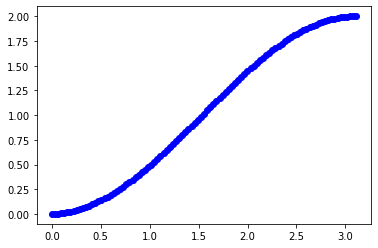

In [13]:
# Cumulative integral

print('{} {}'.format(len(x), len(cumtrapz(np.abs(y), x))))
f, ax = plt.subplots()
ax.plot(x[0:-1], cumtrapz(np.abs(y), x), 'bo');

In [15]:
from scipy.integrate import quad # To compute a definite integral
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the 

In [14]:
from scipy.integrate import quad # To compute a definite integral
from scipy.special import jv # Bessel function
%timeit res = quad(np.sin, 0, np.pi)
print(quad(np.sin, 0, np.pi))
#help(quad)
print(quad(lambda x: jv(3.5, x), 0, 10)) # Integrate the Bessel function of order 2.5 between 0 and 10

26 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
(2.0, 2.220446049250313e-14)
(0.7551384098083599, 9.487330562236267e-10)


We now want to evaluate:
$$ \int_0^1 1 + 2 x + 3 x^2 dx $$

In [19]:
# We want here integrate a user-defined function (here polynome) between 0 and 1
def f(x, a, b, c):
    """ Returning a 2nd order polynome """
    return a + b * x + c * x**2
def f123(x):
    return 1 + 2 * x + 3 * x**2    
def f123b(x, a=1, b=2, c=3):
    return a + b * x + c * x**2
%timeit I = quad(f, 0, 1, args=(1,2,3)) # args will send 1, 2, 3 to f
%timeit I = quad(f123, 0, 1) 
%timeit I = quad(f123b, 0, 1) 
I = quad(f, 0, 1, args=(1,2,3)) # args will send 1, 2, 3 to f
print(I)
Integ = I[0]
print(Integ)

13 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.8 µs ± 199 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.4 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
(3.0, 3.3306690738754696e-14)
3.0


### Interpolations

In [20]:
from scipy.interpolate import interp1d, interp2d, splrep, splev, griddata

In [22]:
#help(scipy.interpolate) # a huge one...
help(interp1d)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``.  This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Note that calling `interp1d` with NaNs present in input values results in
 |  undefined behaviour.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string
 |      ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
 |      

In [32]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
f = interp1d(x, y) # this creates a function that can be call at any interpolate point
f2 = interp1d(x, y, kind='cubic') # The same but using cubic interpolation
tck = splrep(x, y, s=0) # This initiate the spline interpolating function, finding the B-spline representation of 1-D curve.
# tck is a sequence of length 3 returned by `splrep` or `splprep` containing the knots, coefficients, and degree of the spline.
f3 = lambda x: splev(x, tck) # Evaluate the B-spline or its derivatives.

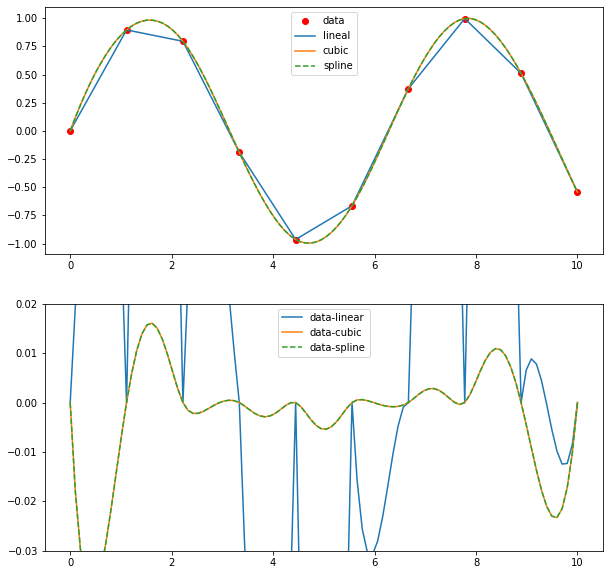

In [33]:
# Defining the high resolution mesh
xfine = np.linspace(0, 10, 100)
yfine = np.sin(xfine)
# Plot to compare the results
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

ax1.plot(x, y, 'or', label='data')
ax1.plot(xfine, f(xfine), label='lineal')
ax1.plot(xfine, f2(xfine), label='cubic')
ax1.plot(xfine, f3(xfine), label='spline', ls='--') 
ax1.legend(loc=9)

ax2.plot(xfine, (yfine - f(xfine)), label='data-linear')
ax2.plot(xfine, (yfine - f2(xfine)), label='data-cubic')
ax2.plot(xfine, (yfine - f3(xfine)), label='data-spline', ls='--')
ax2.legend(loc='best')
ax2.set_ylim((-0.03, 0.02));

In [27]:
x0 = 3.5
print('{} {} {} {}'.format(np.sin(x0), f(x0), f2(x0), f3(x0)))

-0.35078322768961984 -0.3066303359834792 -0.34959725240218925 -0.3495972524021892


#### 2D interpolation

In [34]:
# Defining a 2D-function
def func(x, y):
    return x * (1+x) * np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [49]:
# Initializing a 2D coordinate grid. Note the use of j to specify that the end point is included.
grid_y, grid_x = np.mgrid[0:1:101j, 0:1:201j]

In [50]:
print(grid_x)
print(grid_y)

[[0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 ...
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]
 [1.   1.   1.   ... 1.   1.   1.  ]]


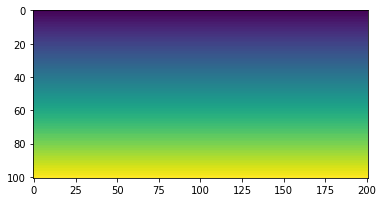

In [52]:
plt.imshow(grid_y)

In [53]:
# Generating 1000 x 2 points randomly
points = np.random.rand(1000, 2)
print(points)
values = func(points[:,0], points[:,1])
print(np.min(points), np.max(points))

[[0.57013156 0.6477694 ]
 [0.97560368 0.06030687]
 [0.72364169 0.1861295 ]
 ...
 [0.99592176 0.58364619]
 [0.49757841 0.70437339]
 [0.81283584 0.36777008]]
2.5241965496136665e-05 0.9999617833674705


In [54]:
# griddata is the 2D-interpolating method. We want to obtain values on (grid_x, grid_y) points, 
# using "points" and "values".
%timeit grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
%timeit grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
%timeit grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

19 ms ± 799 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
12.5 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.3 ms ± 629 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


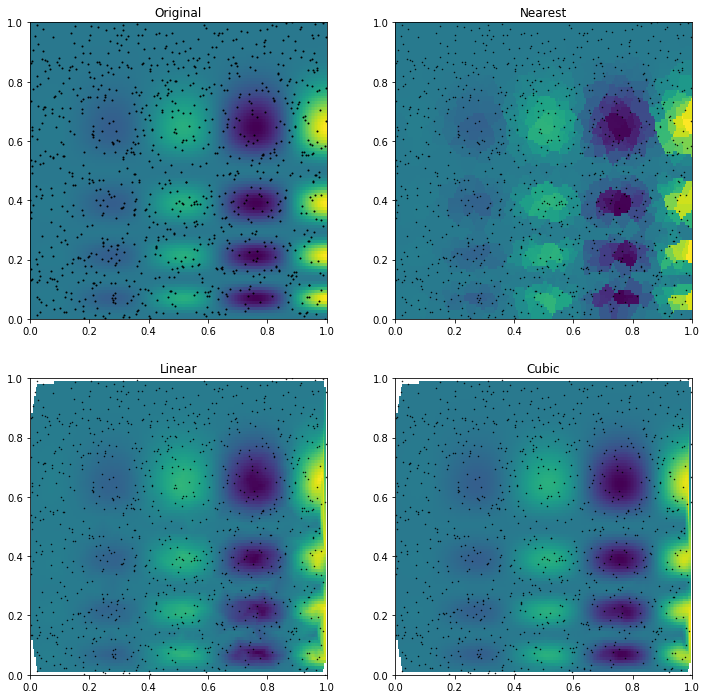

In [57]:
# 4 subplots
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

ax1.imshow(func(grid_x, grid_y), extent=(0,1,0,1), interpolation='none',
           origin='upper')
ax1.plot(points[:,0], points[:,1], 'ko', ms=1)
ax1.set_title('Original')

ax2.imshow(grid_z0, extent=(0,1,0,1), interpolation='none',
           origin='upper')
ax2.plot(points[:,0], points[:,1], 'k.', ms=1)
ax2.set_title('Nearest')

ax3.imshow(grid_z1, extent=(0,1,0,1), interpolation='none',
           origin='upper')
ax3.plot(points[:,0], points[:,1], 'k.', ms=1)
ax3.set_title('Linear')

ax4.imshow(grid_z2, extent=(0,1,0,1), interpolation='none',
           origin='upper')
ax4.plot(points[:,0], points[:,1], 'k.', ms=1)
ax4.set_title('Cubic');

In [62]:
print(grid_z0[10,10], grid_z1[10,10], grid_z2[10,10])

0.0016214165709755681 0.0010009910497726163 0.000723788958478942


### Linear algebra

Scipy is able to deal with matrices, solving linear equations, solving linear least-squares problems and pseudo-inverses, finding eigenvalues and eigenvectors, and more, see here: 
http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html

### Data fit

In [63]:
from scipy.optimize import curve_fit # this is used to adjust a set of data

In [66]:
#help(curve_fit)

In [65]:
def gauss(x, A, B, C, S):
    # This is a gaussian function.
    return A + B*np.exp(-1 * (x - C)**2 / (2 * S**2))

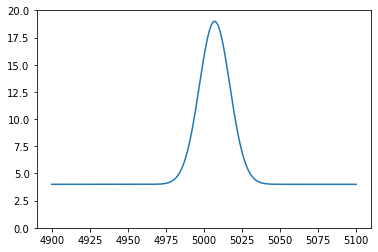

In [68]:
# We define the parameters used to generate the signal (gaussian at lambda=5007)
N_lam = 200
A = 4.
B = 15.
Lam0 = 5007.
Sigma = 10.
# We define a wavelength range
lam = np.linspace(4900, 5100, N_lam)
# Computing the signal
fl = gauss(lam, A, B, Lam0, Sigma)
f, ax =plt.subplots()
ax.plot(lam, fl)
ax.set_ylim(0,20);

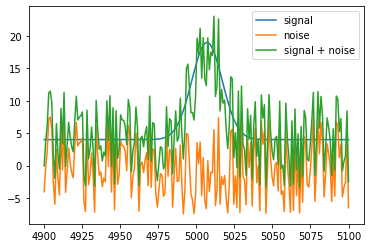

In [69]:
SN = 2. # Signal/Noise
noise = B / SN * (np.random.rand(N_lam)*2 - 1)
fl2 = fl + noise
f, ax =plt.subplots()
ax.plot(lam, fl, label='signal')
ax.plot(lam, noise, label='noise')
ax.plot(lam, fl2, label='signal + noise')
ax.legend(loc='best');

In [70]:
# Initial guess:
A_i = 0.
B_i = 1.
Lam0_i = 5000.
Sigma_i = 1.
fl_init = gauss(lam, A_i, B_i, Lam0_i, Sigma_i)
error = np.ones_like(lam) * np.mean(np.abs(noise)) # We define the error (the same on each pixel of the spectrum)

In [78]:
# fitting the noisy data with the gaussian function, using the initial guess and the errors
fit, covar = curve_fit(gauss, lam, fl2, [A_i, B_i, Lam0_i, Sigma_i], error)
print('{0:.2f} {1:5.2f} {2:.2f} {3:5.2f} {4:5.2f}'.format(A_i, B_i, Lam0_i, Sigma_i, B_i*Sigma_i))
print('{0:.2f} {1:5.2f} {2:.2f} {3:5.2f} {4:5.2f}'.format(A, B, Lam0, Sigma, B*Sigma))
print('{0[0]:.2f} {0[1]:5.2f} {0[2]:5.2f} {0[3]:.2f}  {1:5.2f}'.format(fit, fit[1]*fit[3]))

0.00  1.00 5000.00  1.00  1.00
4.00 15.00 5007.00 10.00 150.00
4.12 13.42 5006.93 8.81  118.21


In [79]:
# Computing the fit on the lambdas
fl_fit = gauss(lam, fit[0], fit[1], fit[2], fit[3])

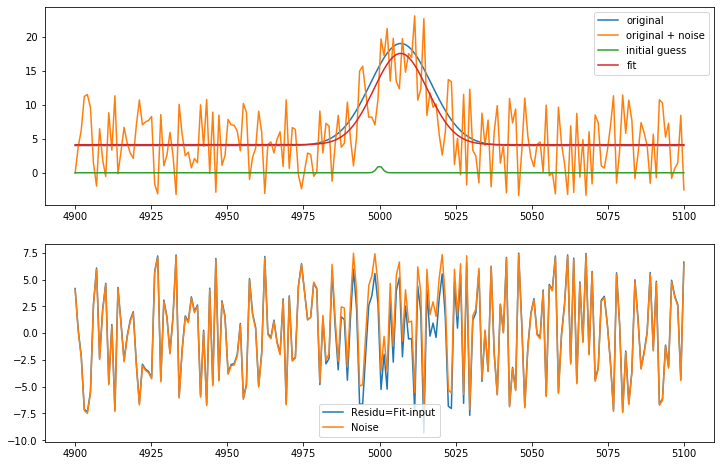

In [80]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(lam, fl, label='original')
ax1.plot(lam, fl2, label='original + noise')
ax1.plot(lam, fl_init, label='initial guess')
ax1.plot(lam, fl_fit, label='fit')
ax1.legend()

ax2.plot(lam, fl_fit - fl2, label='Residu=Fit-input')
ax2.plot(lam, -noise, label='Noise')
ax2.legend();

In [81]:
# Integrating using the Simpson method the gaussian (without the continuum)
print(simps(fl - A, lam))
print(simps(fl2 - fit[0], lam))
print(simps(fl_fit - fit[0], lam))

375.99424119465004
302.9876590127733
296.31956281143505


In [82]:
khi_sq = (((fl2-fl_fit) / error)**2).sum() # The problem here is to determine the error...
khi_sq_red = khi_sq / (len(lam) - 4 - 1) # reduced khi_sq = khi_sq / (N - free_params - 1)
print('khi^2={}, khi^2_reduced={}'.format(khi_sq, khi_sq_red))

khi^2=259.9509045778959, khi^2_reduced=1.333081561937928


### Multivariate estimation

In [83]:
from scipy import stats

In [90]:
def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [91]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()
print(xmin, xmax, ymin, ymax)

-3.241128358076106 3.932762086917964 -4.274334312847188 3.4360457576504504


In [92]:
X, Y = np.mgrid[xmin:xmax:150j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)
print(Z.shape)

(150, 100)


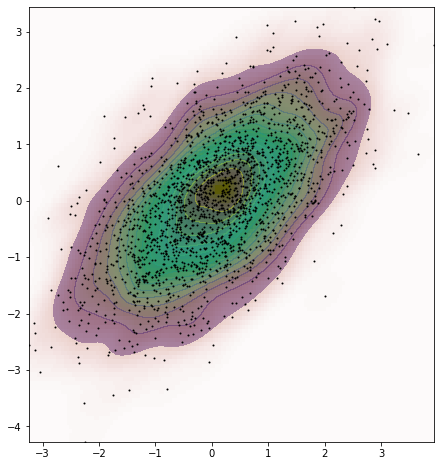

In [102]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax], origin='upper')
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
levels = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15]
cs = ax.contourf(X, Y, Z, levels=levels, alpha=0.4); # I dont't know what those levels mean... but it works fine!

In [88]:
# We save the contour paths in a list
paths = []
for collec in cs.collections:
    try:
        paths.append(collec.get_paths()[0])
    except:
        pass

In [89]:
# Looking for the number of points inside each contour
print(len(m1))
for level, path in zip(levels, paths):
    print('level {0:4.2f} contains {1:2.0f}% of the data'.format(level, 
                                path.contains_points(list(zip(m1, m2))).sum() / float(len(m1))*100))

2000
level 0.01 contains 95% of the data
level 0.02 contains 88% of the data
level 0.03 contains 82% of the data
level 0.04 contains 74% of the data
level 0.05 contains 67% of the data
level 0.06 contains 61% of the data
level 0.07 contains 54% of the data
level 0.08 contains 47% of the data
level 0.09 contains 40% of the data
level 0.10 contains 33% of the data
level 0.11 contains 26% of the data
level 0.12 contains 19% of the data
level 0.13 contains 13% of the data
level 0.14 contains  6% of the data
level 0.15 contains  0% of the data


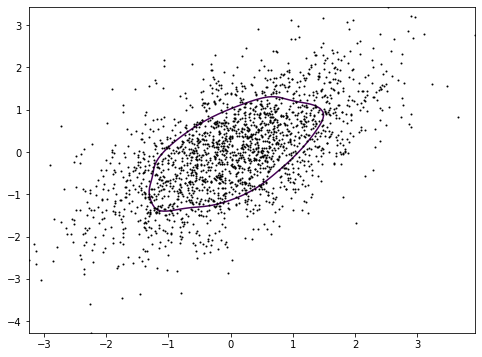

In [104]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
cs = ax.contour(X, Y, Z, levels=[0.075]); #  seems to correspond to 50% of the points inside

### Convolution

More information there: http://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html

In [105]:
# Let's define an image representing a long slit of width 10 pixels
slit = np.zeros((100, 100))
slit[30:50, :] = 1

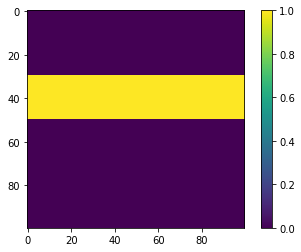

In [106]:
plt.imshow(slit)
plt.colorbar();

In [107]:
# This is the routine to apply a gaussian convolution
from scipy.ndimage.filters import gaussian_filter

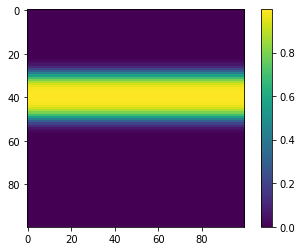

In [116]:
slit_seeing = gaussian_filter(slit, 3) # Convolve with a gaussian, 3 is the standard deviation in pixels
plt.imshow(slit_seeing)
plt.colorbar();

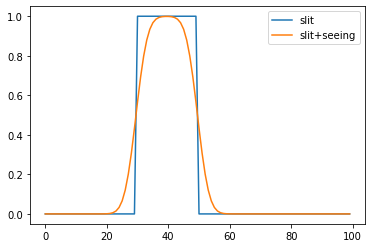

In [117]:
f, ax =plt.subplots()
ax.plot(slit[:,50], label='slit') # original slit
ax.plot(slit_seeing[:,50], label='slit+seeing') # slit with seeing
ax.legend(loc='best');

In [118]:
# Check that the slit transmission is conserved:
print(simps(slit[:,50]), simps(slit_seeing[:,50]))

20.0 20.0


### Quantiles

In [120]:
from scipy.stats.mstats import mquantiles

In [122]:
#help(mquantiles)

In [119]:
data = np.random.randn(1000)

In [124]:
mquantiles(data, [0.16, 0.5,0.84]) # should return something close to -1, 1 (the stv of the normal distribution)

array([-0.95251222,  0.02438251,  1.0777994 ])

In [125]:
data = np.array([[   6.,    7.,    1.],
                         [  47.,   15.,    2.],
                         [  49.,   36.,    3.],
                         [  15.,   39.,    4.],
                         [  42.,   40., -999.],
                         [  41.,   41., -999.],
                         [   7., -999., -999.],
                         [  39., -999., -999.],
                         [  43., -999., -999.],
                         [  40., -999., -999.],
                         [  36., -999., -999.]])

In [131]:
mq = mquantiles(data, axis=0, limit=(0, 50))
print(mq)
print(type(mq))
mq?
print(mq.mask)

[[19.2  14.6   1.45]
 [40.   37.5   2.5 ]
 [42.8  40.05  3.55]]
<class 'numpy.ma.core.MaskedArray'>
False


Type:        MaskedArray
String form:
[[19.2  14.6   1.45]
 [40.   37.5   2.5 ]
 [42.8  40.05  3.55]]
Length:      3
File:        ~/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py
Docstring:  
An array class with possibly masked values.

Masked values of True exclude the corresponding element from any
computation.

Construction::

  x = MaskedArray(data, mask=nomask, dtype=None, copy=False, subok=True,
                  ndmin=0, fill_value=None, keep_mask=True, hard_mask=None,
                  shrink=True, order=None)

Parameters
----------
data : array_like
    Input data.
mask : sequence, optional
    Mask. Must be convertible to an array of booleans with the same
    shape as `data`. True indicates a masked (i.e. invalid) data.
dtype : dtype, optional
    Data type of the output.
    If `dtype` is None, the type of the data argument (``data.dtype``)
    is used. If `dtype` is not None and different from ``data.dtype``,
    a copy is performed.
copy : bool, optional
    Wheth

### Input/Output

Scipy has many modules, classes, and functions available to read data from and write data to a variety of file formats.

Including MATLAB and IDL files. See http://docs.scipy.org/doc/scipy/reference/io.html